<base target="_blank">

This Notebook is an adaptation of the [tutorial](https://maartengr.github.io/BERTopic/algorithm/algorithm.html) generated from Maarten Grootendorst.

## **What is Topic Modeling?**
*The following image was sourced from [Blei, 2021](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=8OYE6iEAAAAJ&citation_for_view=8OYE6iEAAAAJ:OBSaB-F7qqsC)*

Imagine entering a bookstore to buy a cooking book and being unable to locate the part of the store where the book is located, presuming the bookstore has just placed all types of books together. In this case, the importance of dividing the bookstore into distinct sections based on the type of book becomes apparent. Topic Modeling is a process of detecting themes in a text corpus, similar to splitting a bookshop depending on the content of the books. The main idea behind this task is to produce a concise summary highlighting the most common topics from a corpus of thousands of documents.

*This example was inspired by the following [blog](https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/)*
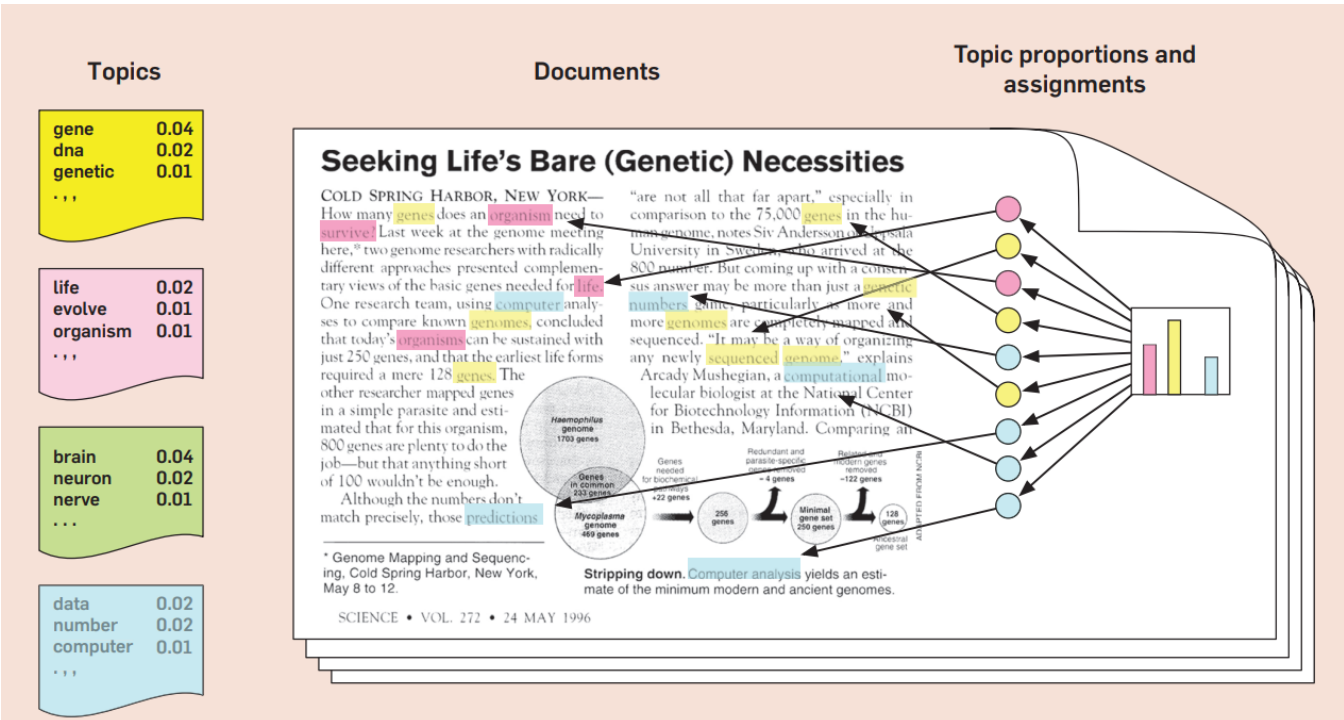

This model takes a set of documents as input and generates a set of topics that accurately and cherently describe the content of the documents. It is one of the most commonly used approaches for processing unstructured textual data, this type of data contains information not organized in a pre-determined way. 


## **How does BERTopic work?**

BERTopic is a deep learning approach of topic modeling. [Devlin et al. (2018)](https://arxiv.org/abs/1810.04805) presented Bidirectional Encoder Representations from Transformers (BERT) as a fine-tuning approach in late 2018. BERT is a pre-training strategy
for Natural Language Processing (NLP) that successfully exploits a sentence’s deep semantic information [(Hosseini and Varzaneh, 2022)](https://dl.acm.org/doi/abs/10.1007/s11042-022-12155-0). If the first thing that comes to mind when reading the word Transformers is the movie, then you might want to look at a [blog](https://jalammar.github.io/illustrated-transformer/) written by Jay Alammar before continuing with this article.



A variation of Bidirectional Encoder Representations from Transformers (BERT) has been developed to tackle topic modeling tasks. BERTopic was developed in 2020 by [Grootendorst](https://maartengr.github.io/BERTopic/index.html) and is a combination of techniques that use transformers and class TF-IDF (term frequency-inverse document frequency) to produce dense clusters that are easy to understand while maintaining significant words in the topic description.This deep learning approach supports sentence-transformers model for over 50 languages for document embedding extraction [(Egger and Yu, 2022)](https://www.researchgate.net/publication/360410995_A_Topic_Modeling_Comparison_Between_LDA_NMF_Top2Vec_and_BERTopic_to_Demystify_Twitter_Posts). This topic modeling technique follows three steps: document embeddings, document clustering and document TF-IDF.

**1. Document Embeddings**

The first step of the model is responsible for converting the corpus to document and
word embeddings. This is a way to map the words into numerical vector spaces while
considering the semantic meaning of words. 

**2. Document Clustering**

Before clustering the embeddings, a dimensionality reduction is implemented. Reducing
the dimensions has its benefits; for example, it takes care of redundant features, takes
less computation and training time, and helps visualise data.


**3. Third Step: Document C-TF-IDF**

*The following image was sourced from [Grootendorst](https://maartengr.github.io/BERTopic/algorithm/algorithm.html#5-topic-representation).*

The topic representations are based on the documents in each cluster, with one topic
given to each cluster. To discover what distinguishes one topic from another based
on its cluster words, a class-based TF-IDF is implemented. The original formula concerns measuring the representation of the importance of a word to a document, while
the adaptation concerns the representation of a term’s significance to a topic instead.

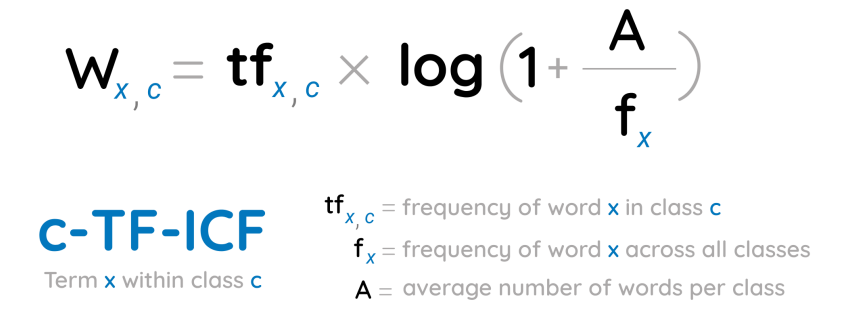

The purpose of the class-based TF-IDF is to provide the same class vector to all
documents inside a single class. The frequency of each word is extracted for each
class and divided by the total number of words. This is a form of regularization of
frequent words in the class, then the total number of documents is divided by the
total frequency of word across all classes . As a result, rather than modeling the value
of individual documents, this class-based TF-IDF approach models the significance of words in clusters. This enables us to create topic-word distributions for each document
cluster ([Grootendorst, 2022)](https://maartengr.github.io/BERTopic/index.html).


# **Implementation**

Enough on the theoretical component, lets get our hands dirty! This notebook is implementing a deep learning approach of topic modeling, BERTopic.

*If this is the first time using BERTopic the following line is necessary*

In [19]:
#pip install bertopic

### **Step 0: Loading the the data and relevant packages**

The first step in order to start with the topic modeling task is to load the desired data as well as the relevant packages for preparing the data. The [data](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) used for this notebook is a collection of approximately 20,000 newsgroup documents, partitioned evenly across 20 different newsgroups.

In [8]:
import nltk
import gensim
import gensim.corpora as corpora
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from gensim.models.coherencemodel import CoherenceModel
from sklearn.datasets import fetch_20newsgroups

### **Step 1: Reviewing and preparing the data**

Text data is unstructured and if we want to extract information from large volume texts, reading is not an option. You need to process those texts to obtain structured representations. 
The common idea for all NLP tools is that they try to transform text in some meaningful way. Before diving into the topic modeling task itself, we need to review and prepare the textual data. 


**1.1 Data Statistics**

By reviewing the format, length as well as the type of data, it can provide a better understanding and useful information in terms of what kind pre-processing steps need to be implemented. The following cell provides some information concerning the data we are using. 

In [9]:
dataset = fetch_20newsgroups(subset='train')['data']

In [10]:
print(len(dataset)) #the length of the data
print(type(dataset)) # the type of variable the data is stored in 
print(dataset[:1]) # the first instance of the content within the data

11314
<class 'list'>
["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"]


**1.2 Dataframe**

A DataFrame is a two dimensional data structure of a table with rows and columns. With the creation of a DataFrame from textual data it makes the inspection and understanding of the data easier. Moreover, this function can take on a lot of different structures as input.The package used to generate a dataframe is [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [1]:
#Creating a dataframe from the data imported 
full_train = pd.DataFrame() 
full_train['text'] = dataset
full_train.head()

documents = full_train

**1.3 Pre-processing**                   

As it can be seen from the output of the previous cells the data is not ready for the topic modeling task. It contains many elements that create 'noise' in the data such as punctuation, content words, etc. The process of preparing textual data can be consuming as the input used for the model is crucial for the quality of a language model. Based on the data used in this notebook the following pre-processing steps are implemented:

**1.3.1 Tokenization:**
A token is the word or the punctuation mark as it appears in the sentence.Tokenization is the process of splitting the sentences into individual words/punctuation. This process is beneficial as it divides the text data into pieces and thus make it easier for a language model to distinguish.  

**1.3.2 Lemmatization**
A lemma is the root form of a token; for instance, the word ‘undivided’ within a sentence is a token and ‘divide’ would be the corresponding lemma. In this case we are lemmatizing to prevent redundant topics such as ‘books’ and ‘book’. 

**1.3.3 Filtering**
Removing words that do not contain any meaning such as: pronouns,determiners and conjuctions. Filtering reduces the 'noise' within the data and helps the language model when training. 

In [14]:
#If the following packages are not already downloaded, the following lines are needed 
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')

filtered_text = []
lemmatizer = WordNetLemmatizer()

for w in dataset:
  filtered_text.append(lemmatizer.lemmatize(w))
print(filtered_text[:1])

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"]


### **Step 2: Input preparation for topic model**


**2.1.**   **Extracting embeddings:** converting the data to numerical representation. This is important for the clustering procedure as embedding models are otpimized for semantic similarity. 

  **Within the definition provided of the first step there are a lot of important keywords. If this is the first time coming across these words a further explanation is provided below:**

  > **What is a cluster?**  
> Clustering is the process of grouping similar items together.


  > **What is an embedding model?**        
  > An embedding model is the procedure of transforming data into a numerical value that encodes the meaning of the word. Words that are closer within the vector space are expected to be similar in meaning.

> **What is semantic similarity?**   
> Semantic similarity is when a set of documents or words are related to each other conceptually.


In [16]:
# Step 2.1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

**2.2 Dimensionality Reduction:** Clustering models have difficulty when in comes to high dimensional data. Therefore by reducing the dimensionality it becomes easier and efficent for the model. In this case we are using UMAP, this technique is able to keep the data's local and global structure when reducting dimensionality. 

**Keyword Explanation:**

> **What is a dimension?**  
> Dimension is called the distance between words in an embedding space that are meaningful.



In [ ]:
# Step 2.2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')



**2.3.**   **Cluster Documents:** After the reduction of the embeddings, the clustering procedure can take place. The method used in this case is HDBSCAN. This method is a desity-based clustering method that finds clusters of different shapes and identifying outliers where possible. 

In [ ]:
# Step 2.3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

**2.4.**   **Bag-of-words(BOW):** This approach counts how often each word appears in each cluster, residing the frequency of each word.

In [ ]:
# Step 2.4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")


**2.5.**   **Topic representation:** The topic representations are based on the documents in each cluster, with one topic
given to each cluster. To discover what distinguishes one topic from another based on its cluster words, a class-based TF-IDF is implemented. 

**Keyword Explanation:**


>**What does TF-IDF stand for?**

This abbreviation stands for: term frequency-inverse document frequency.

> **What is the funtion of this formula?**

The original formula concerns measuring the representation of the importance of a word to a document. While in this case where we are using a class-based TF-IDF concerns the representation of a term’s significance to a topic instead.

In [ ]:
# Step 2.5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

### **Step 3: Setting the parameters and training the model**

This deep learning approach can also be implemented in various ways. At the end of the day the model's performance comes down to estimating the right parameters for the specific case. One of the most important parameters when it comes to a topic modeling task is the **Number of topics**. Depending on the data as well as the goal of the task a grid search can be executed in order to find the optimal parameters. A grid search is a tool used for exhaustively searching the hyperparameter space given in an algorithm by trying different values and then picking the value with the best score.


#### **Parameters for this implementation**

    1.embedding_model = Using an embedding model (based on the task and preference there are several embedding models that can be used).
    2.umap_model = Using a UMAP model for dimensionality reduction.
    3.hdbscan_model = Using HDBSCAN model for clustering purposes.
    4.vectorizer_model = Using a custom vectorizer (see step 2.4)
    5.ctfidf_model = Using a custom classTfidfTransformer (see step 2.5)
    6.nr_topics = specifying the number of topics for extraction.
    
Additional [parameters](https://maartengr.github.io/BERTopic/api/bertopic.html) that can be used! 

In [ ]:
topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  nr_topics=10                        
)

**3.1 Training**

The following step trains the model with all the parameters that we have set. BERTopic supports guided, (semi-) supervised, and dynamic topic modeling. If you would like to have a better overview of this topic modeling approach and how it works please have a look at the [BERTopic website](https://maartengr.github.io/BERTopic/index.html) generated by the creator. 

**It is worth mentioning that depending on the size of the data the training step might be time consuming*


In [ ]:
topics, probabilities = topic_model.fit_transform(filtered_text)


> **What is a topic and a probability in this case?**

Topics represent the concise summary highlighting the most common topics from a corpus and probabilities demonstrate the likelihood of a document falling into any of the possible topics.



### **Step 4: Results**  

With the help of visualization we can easily inspect and understand the output of our topic model. For this notebook two different types of visualizations were chosen. There are multiple different ways to visualize the output of a topic model. A great overview of the visualization options for this model can be found in the [BERTopic website](https://maartengr.github.io/BERTopic/index.html)



**4.1 Interactive graph - Topics** 

Visualize topics, their sizes, and their corresponding words. [This visualization](https://maartengr.github.io/BERTopic/api/plotting/topics.html#bertopic.plotting._topics_per_class.visualize_topics_per_class) is highly inspired by LDAvis, a great visualization technique typically reserved for LDA. 

In [17]:
topic_model.visualize_topics()

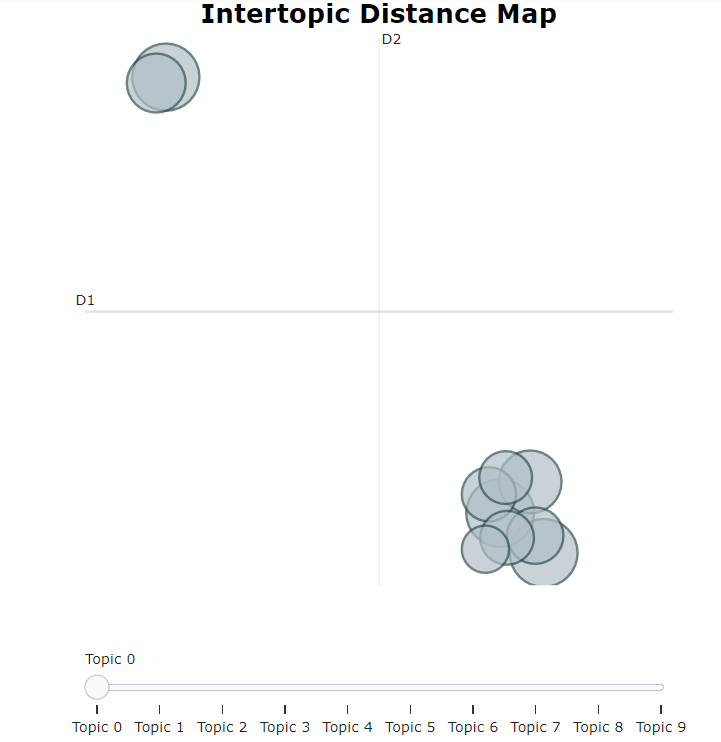

**4.2 Barchart**

Another way of visualizing the generated topics is using a [barchart](https://maartengr.github.io/BERTopic/api/plotting/barchart.html#bertopic.plotting._topics_per_class.visualize_topics_per_class). The following function generates a graph that contains 10 different barcharts, each barchart represents a topic and their corresponding terms. 

In [18]:
topic_model.visualize_barchart()

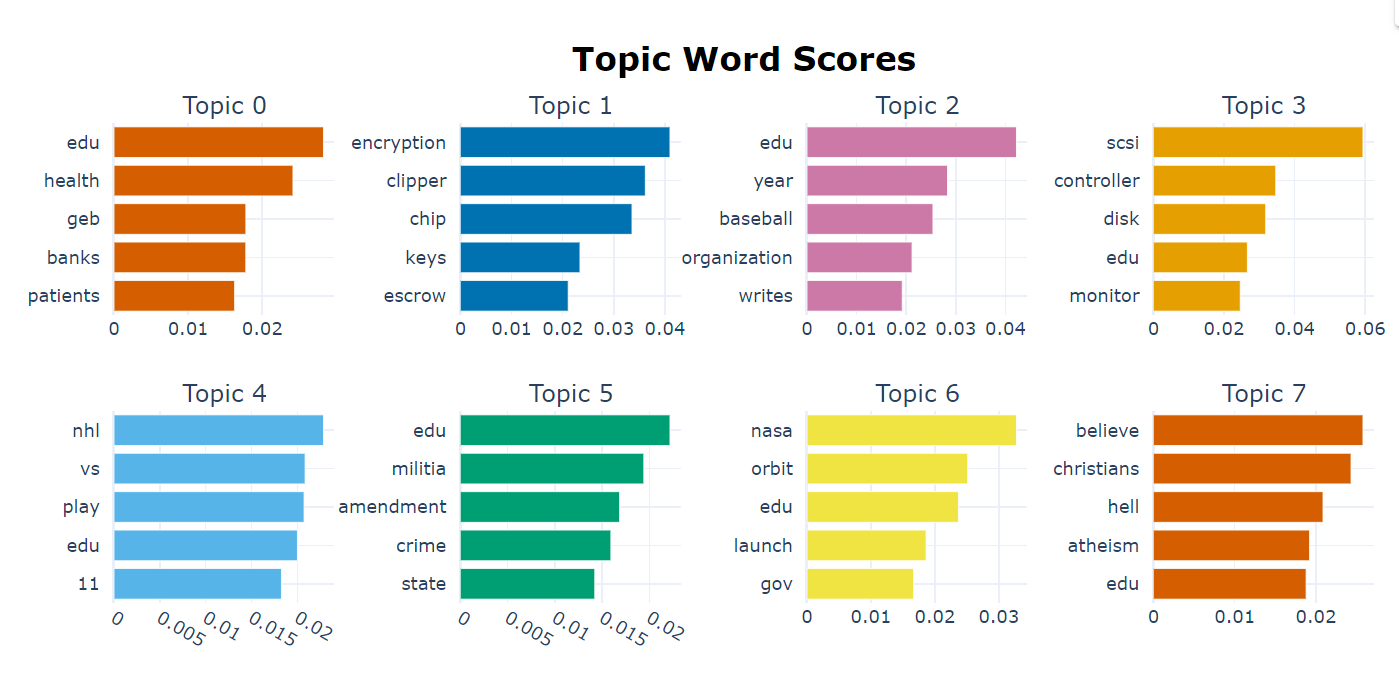

### **Discussion**

Let's take a moment to discuss some of the topics generated! If we take a closer look at topic 3, we can see that there are semantically related words combined such as 'controller', 'disk' and 'monitor'. Based on human judgment it can be assumed that the topic concerns computer/technological equipment. Another example can be topic 7 as it contains terms such as 'hell', 'atheism', 'believe' and 'christians', this can lead us to the assumption that the topic is about subject concerning religious matters.

### **Step 5:Evaluation**

The unsupervised nature of topic models makes the model selection problematic; therefore, evaluation is an important issue. Topic coherence is a part of the larger subject of what are good topics, what properties of a document collection make it more suitable for topic modeling, and how can
topic modeling’s potential be utilized for human benefit ([Newman et al., 2010](https://aclanthology.org/N10-1012.pdf)). This
evaluation method can be defined as the degree of significance between the words inside a topic in terms of how interpretable it is. The goal of the topic coherence metrics
employed is to assess the quality of topics from a human-like standpoint.

* **C_v**: this measure ‘is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity’ ([Mifrah and Benlahmar, 2020](https://www.researchgate.net/publication/344238129_Topic_Modeling_Coherence_A_Comparative_Study_between_LDA_and_NMF_Models_using_COVID%2719_Corpus)).

* **C-umass**: this measure takes into consideration the document co-occurrence
counts, one-preceding segmentation, and a logarithmic conditional probability as
a confirmation measure ([Mifrah and Benlahmar, 2020](https://www.researchgate.net/publication/344238129_Topic_Modeling_Coherence_A_Comparative_Study_between_LDA_and_NMF_Models_using_COVID%2719_Corpus)).
.

In [ ]:
documents = pd.DataFrame({"Document": filtered_text,
                          "ID": range(len(filtered_text)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
print(coherence)

0.6301059094077373


In [ ]:
documents = pd.DataFrame({"Document": filtered_text,
                          "ID": range(len(filtered_text)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence = coherence_model.get_coherence()

In [ ]:
print(coherence)

-0.3443799764585796


### **Discussion**

This deep learning approach is a great contribution to the topic modeling field as it has solve many of the limitation of traditional models such as LDA. However, this does not mean that it does not have its own limitations. 

**Limitations**
 
When it comes to topic representation,  this model **does not consider the cluster’s centroid**. A cluster centroid is ‘a vector that contains one number for each variable, where each number is the mean of a variable for the observations in that cluster. The centroid can be thought of as the multi-dimensional average of the cluster’ [(Zhong, 2005)](https://www.semanticscholar.org/paper/Efficient-online-spherical-k-means-clustering-Zhong/9a6824ffa600f06aca27b9dd54fa8d75a5cf4a16). While BERTopic takes a different approach, it concentrates on the cluster, attempting to simulate the cluster’s topic representation. This provides for a broader range of subject representations while ignoring the concept of centroids. Depending on the data type, ignoring the cluster’s centroids can be a disadvantage. Moreover, even though BERTopic’s transformer-based language models allow for contextual representation of documents, the topic representation does not directly account for this because it is derived from bags-of-words. The words in a subject representation illustrate the significance of terms in a topic while also implying that those words are likely to be related. As a result, terms in a topic may be identical to one another, making them **redundant** for the topic’s interpretation ([Grootendorst, 2022)](https://maartengr.github.io/BERTopic/index.html). Finally, an essential disadvantage of BERTopic is the **time** needed for fine-tuning, for this project an hour was needed for this model to train. 

### **Closing Notes**

This notebook was aiming to introduce a topic modeling task and highlight the importance of retrieving hidden topics within a great amount of text data. Moreover, to show the value of an NLP task such as topic modeling, this automatic topic retrieval can provide a company with information about the most frequent matters that the customers talk about and improve a company’s strategy and assist in developing marketing platforms.  